# Fundamentals of Language Modeling

# Acknowledgements
- I have extensively relied on [Lena Voita's Blog on Language Models](https://lena-voita.github.io/nlp_course/language_modeling.html#evaluation)

- Much of the content was also contributed by [Ritwik Mishra](https://www.linkedin.com/in/koiritwikhai/?originalSubdomain=in), a fellow PhD scholar from PreCog, developed as part of PreCog's series of LLMWorkshops in Spring of 2024.

##    
## What is "Language Modeling" ?
## What is meant by a "model"?
## What does it mean to "model" a "language"?


- A good model would simulate the behavior of the real world/phenomena.

- Would "understand" which events are in better agreement with the world, i.e., which of them are more likely.

- Language : an event is a linguistic unit (text, sentence, token, symbol).

- Goal of a language model is to estimate the probabilities of these events.
Language Models (LMs) estimate the probability of different linguistic units: symbols, tokens, token sequences.


## You can estimate probabilities of different linguistic units --- So what?

 - can be leveraged in unexpected ways
    - "What is the sentiment of the sentence 'IITM campus is fab, but the weather is meh!' ?" ____



- Humans have some feeling of "probability" when it comes to natural language
    - disambiguate between different options
    - which sound similar

- Whole LM game is answering a central question -
    - "How a machine is supposed to understand language?"

A machine needs a language model, which
  - estimates the probabilities of sentences.
  - If a language model is good, it will assign a larger probability to a correct option.

## One way to mathematically denote this idea is...



<img src='https://lena-voita.github.io/resources/lectures/lang_models/general/i_saw_a_cat_prob.gif' width = 1000px>

$$
P(y_1, y_2, \dots, y_n)=P(y_1)\cdot P(y_2|y_1)\cdot P(y_3|y_1, y_2)\cdot\dots\cdot P(y_n|y_1, \dots, y_{n-1})=
        \prod \limits_{t=1}^n P(y_t|y_{\mbox{<}t})
$$



<img src='https://lena-voita.github.io/resources/lectures/lang_models/general/need_to_define-min.png' width = 1000px>

- Once we have a language model, we can use it to generate text.
- We do it one token at a time: predict the probability distribution of the next token given previous context, and sample from this distribution.


In [ ]:
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://lena-voita.github.io/resources/lectures/lang_models/general/generation_example.mp4" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

/usr/local/lib/python3.10/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## A random language model!

In [ ]:
# random Language Model
import random
def generate_sentence(ml, N, random_seed=None):
    # Initialize random seed if provided
    if random_seed is not None:
        random.seed(random_seed)

    # Pick a random word from the list
    word = random.choice(ml)

    # Initialize the sentence with the first word
    sentence = [word]

    # Loop to add more words until the desired length is reached
    while len(sentence) < N:
        word = random.choice(ml)
        sentence.append(word)

    # Join the words to form the sentence
    final_sentence = ' '.join(sentence)
    return final_sentence
# Example usage:
ml = sorted(['machine', 'learning', 'is', 'a', 'subset', 'of', 'artificial', 'intelligence'])
print('Vocab',ml)
random_seed = 42
N = 8  # Length of the sentence

sentence = generate_sentence(ml, N, random_seed)
print(sentence)


Vocab ['a', 'artificial', 'intelligence', 'is', 'learning', 'machine', 'of', 'subset']
artificial a learning is is intelligence artificial artificial


# Statistical Language Modeling

$$
P(y_t|y_1, \dots, y_{t-1}) = \frac{N(y_1, \dots, y_{t-1}, y_t)}{N(y_1, \dots, y_{t-1})},
$$

For the same reasons we discussed before, this won't work well: many of the fragments do not occur in a corpus and, therefore, will zero out the probability of the sentence. To overcome this problem, we make an independence assumption (assume that the Markov property holds):




The probability of a word only depends on a fixed number of previous words.

$$
P(y_t|y_1, \dots, y_{t-1}) = P(y_t|y_{t-n+1}, \dots, y_{t-1}).
$$

For example,

n=3 (trigram model):  $$ P(y_t|y_1, \dots, y_{t-1}) = P(y_t|y_{t-2}, y_{t-1}) $$

n=2 (bigram model): $$ P(y_t|y_1, \dots, y_{t-1}) = P(y_t|y_{t-1}) $$

n=1 (unigram model): $$ P(y_t|y_1, \dots, y_{t-1}) = P(y_t) $$



<img src='https://lena-voita.github.io/resources/lectures/lang_models/ngram/example_cut_3gram-min.png' width = 1000px>



<img src='https://lena-voita.github.io/resources/lectures/lang_models/ngram/denominator_zero-min.png' width = 1000px>

<img src='https://lena-voita.github.io/resources/lectures/lang_models/ngram/interpolation-min.png' width = 1000px>


<img src='https://lena-voita.github.io/resources/lectures/lang_models/ngram/numerator_zero-min.png' width = 1000px>


<img src='https://lena-voita.github.io/resources/lectures/lang_models/ngram/laplace-min.png' width = 1000px>


- If you generate samples using these simple models
    - these samples are not fluent:
    - it can be clearly seen that the model does not use long context, and relies only on a couple of tokens.
    - The inability to use long contexts is the main shortcoming of n-gram models.




Differently from n-gram models that define formulas based on global corpus statistics, neural models teach a network to predict these probabilities.


Intuitively, neural Language Models do two things:

- get a vector representation for the previous context. Using this representation, a model predicts a probability distribution for the next token.

- generate a probability distribution for the next token → model-agnostic

- Main flaw of n-gram LMs - fixed context size,


NEURAL MODELS TO THE RESCUE!

In [ ]:
!git clone https://github.com/burhanharoon/N-Gram-Language-Model.git

Cloning into 'N-Gram-Language-Model'...
remote: Enumerating objects: 516, done.
remote: Counting objects: 100% (516/516), done.
remote: Compressing objects: 100% (490/490), done.
remote: Total 516 (delta 16), reused 512 (delta 12), pack-reused 0
Receiving objects: 100% (516/516), 811.59 KiB | 6.71 MiB/s, done.
Resolving deltas: 100% (16/16), done.


In [ ]:
# downloads corpus data
# !gdown 1uBnHSE5g4jnkD76aVex0h5RpuJnaPFKD
# !unzip corpus.zip
import re
import os
import numpy
import glob

textFile = []
for fname in glob.glob('/content/N-Gram-Language-Model/corpus/**/*.txt', recursive=True):
    with open(fname,'r') as f:
        textFile.append(f.read())

In [ ]:
textFile[0]

'Hunt ban support is \'in decline\'\n\nSupport for a ban on hunting has fallen in the past six years, a poll suggests.\n\nLess than half the UK wants a ban compared to almost two-thirds in 1999, the Mori survey of 2,000 adults for BBC One\'s Countryfile programme suggests. The number opposed to a ban remains constant, but those "neither supporting nor opposing" has increased by 11%. Most city-dwellers support the ban but rural people were evenly split between supporters, opponents and undecided.\n\nPolling company Mori carried out both surveys. In July 1999 they asked 801 adults if they supported the ban for the Mail on Sunday. For Countryfile they asked 2,234 adults across the country the same question. The Mail on Sunday survey found that 63% supported a hunting ban compared with 24% against. In the Countryfile survey, 47% said they supported the legislation, with 26% against. But the programme makers suggest the British public are becoming "increasingly neutral" to the issue because

In [ ]:
# courtesy of https://github.com/burhanharoon/N-Gram-Language-Model

def reverseWords(string):
    if string:
        words = string.split(' ')
        rev = ' '.join(reversed(words))
        return rev


def findCountAtStartOfSentence(word, corpus):
    count = 0
    for sentence in corpus:
        if sentence.startswith(word):
            count += 1
    return count


# Splits file into sentences
def tokenize(file):
    sentences = re.split(r"[.?!]\s+", file)
    return sentences


# Splits a sentence into words
def splitToWords(sentence):
    temp = sentence.split()
    return temp


sentences = []
for files in textFile:
    temp = (tokenize(files))
    for sentence in temp:
        sentences.append(sentence)


words = []

for sentence in sentences:
    for x in splitToWords(sentence):
        words.append(x)

totalWordsCount = len(words)
uniqueWords = set(words)
totalUniqueWordsCount = len(uniqueWords)

# returns the n-grams
def getNGramString(string, ngramNumber):
    string = string.lower()
    string = splitToWords(string)
    if ngramNumber == 1:
        return string
    else:
        totalGrams = [string[0]]
        for index, word in enumerate(string):
            i = index
            toFindProb = ''
            if index > 0 and ngramNumber > 1:
                for j in range(ngramNumber):
                    if i >= 0:
                        toFindProb = toFindProb + string[i]
                        toFindProb += ' '
                        i -= 1
            if toFindProb:
                realWord = toFindProb.strip()
                totalGrams.append(reverseWords(realWord))
        return totalGrams


def findCount(word, corpus):
    count = 0
    for sentence in corpus:
        expression = r"\b" + re.escape(word) + r"\b"
        temp = re.findall(expression, sentence)
        count += len(temp)
    return count


# returns probability of a sentence using bi-gram, product of probabilities of each word conditioned on the previous word(since n=2)
def SentenceProb(sentence, corpus, totalWordsCount):
    ngramString = getNGramString(sentence, 2) # set n here
    sentence = sentence.lower().split()
    totalProbability = []
    probOfFirstWord = findCountAtStartOfSentence(
        sentence[0], corpus)/totalWordsCount
    totalProbability.append(probOfFirstWord)
    for i in range(1, len(sentence)):
        temp = findCount(ngramString[i], corpus)
        if temp:
            result = temp/findCount(sentence[i], corpus)
            totalProbability.append(result)
        else:
            totalProbability.append(0)
    result = numpy.prod(totalProbability)
    return result,totalProbability


# returns smooth probability of a sentence using bi-gram, product of probabilities of each word conditioned on the previous word(since n=2)
# laplace smoothing
def SmoothSentenceProb(sentence, corpus, totalWordsCount, uniqueWords):
    ngramString = getNGramString(sentence, 2) # set n here
    sentence = sentence.lower().split()
    totalProbability = []
    probOfFirstWord = findCountAtStartOfSentence(
        sentence[0], corpus)+1/totalWordsCount+uniqueWords
    totalProbability.append(probOfFirstWord)
    for i in range(1, len(sentence)):
        temp = (findCount(ngramString[i], corpus)+1)
        result = temp/(findCount(sentence[i], corpus)+uniqueWords)
        totalProbability.append(result)
    result = numpy.prod(totalProbability)
    return result,totalProbability


# Calculates perplexity of the sentence
def perplexity(probability, totalWordsCount):
    perplexity = 1/probability
    perplexity = pow(perplexity, totalWordsCount)
    return perplexity


probability,iProbs = SmoothSentenceProb("The batman was a hit",
                                 sentences, totalWordsCount, totalUniqueWordsCount)
probabilityWS,iProbsWS = SentenceProb("The batman was a hit",
                                 sentences, totalWordsCount)


print("WITH SMOOTHING: The probability is: ", probability, "Individual word probs are", iProbs)
print("WITHOUT SMOOTHING: The probability is: ", probabilityWS, "Individual word probs are", iProbsWS)


WITH SMOOTHING: The probability is:  1.595085870550461e-11 Individual word probs are [21485.000005947248, 4.6550600502746487e-05, 4.391164976068151e-05, 0.003912552436269765, 9.282896263634253e-05]
WITHOUT SMOOTHING: The probability is:  0.0 Individual word probs are [1.7841743733087514e-05, 0, 0, 0.029003021148036254, 0.015873015873015872]


# Neural Language Models

In [ ]:
HTML('<iframe width="560" height="315" src="https://lena-voita.github.io/resources/lectures/lang_models/neural/nn_lm_prob_idea.mp4" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

/usr/local/lib/python3.10/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


This is classification!

We can think of neural language models as neural classifiers. They classify prefix of a text into |V| classes, where the classes are vocabulary tokens.


- feed word embedding for previous (context) words into a network;
- get vector representation of context from the network;
- from this vector representation, predict a probability distribution for the next token.


## Feed Forward Neural Network as LM
<img src='https://lena-voita.github.io/resources/lectures/lang_models/neural/nn_lm_idea_linear-min.png' width = 1000px>



---



## Recurrent Neural Network as LM

<img src='https://lena-voita.github.io/resources/lectures/lang_models/neural/rnn/rnn_simple-min.png' width = 750px>






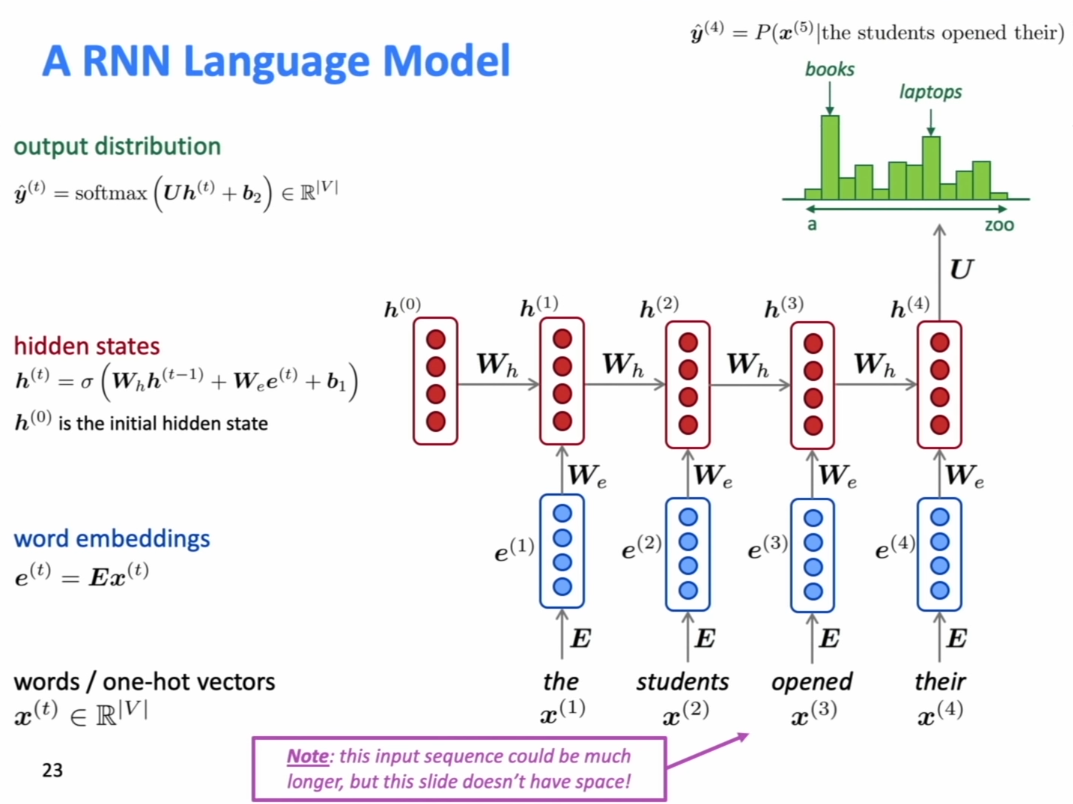


<img src='https://lena-voita.github.io/resources/lectures/lang_models/neural/rnn/multi_layer-min.png' width = 750px>



## Attention



*   Language Modelling ❌
*   Machine Translation ✅



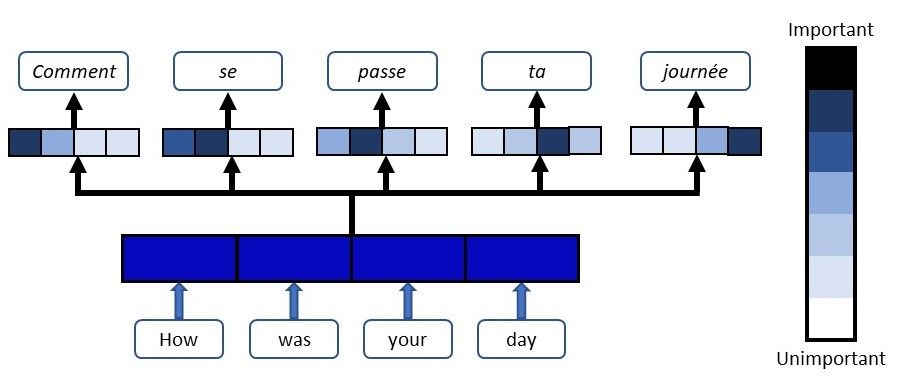

[source](https://blog.floydhub.com/attention-mechanism/)

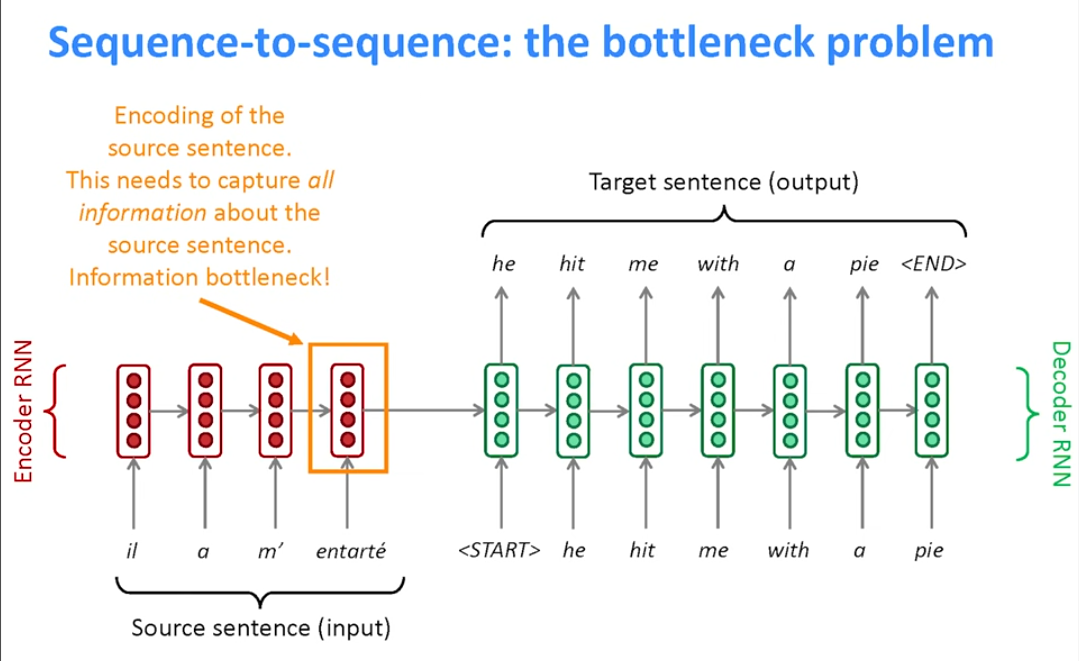

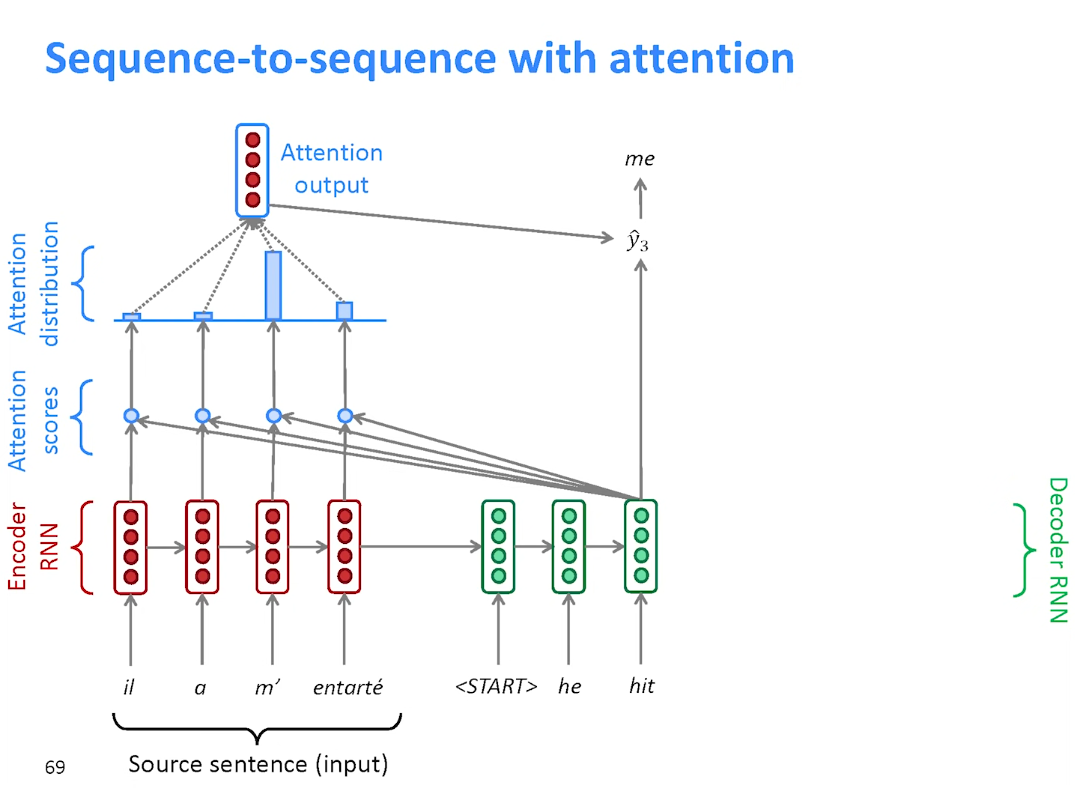

[source](https://youtu.be/XXtpJxZBa2c?list=PLoROMvodv4rOhcuXMZkNm7j3fVwBBY42z&t=3734)

# Generation Strategies

Two main requirements:
- coherent - the generated text has to make sense;
- diverse - the model has to be able to produce very different samples.


## Standard Sampling vs Sampling with temperature

<img src='https://lena-voita.github.io/resources/lectures/lang_models/sampling/softmax_temp_before_after-min.png' width = 750px/>



<img src='https://lena-voita.github.io/resources/lectures/lang_models/sampling/softmax_temperature-min.png' width=750px/>


- [Interactive tool to understand effect of temperature](https://lena-voita.github.io/resources/lectures/lang_models/sampling/softmax_temperature.html)



<img src='https://lena-voita.github.io/resources/lectures/lang_models/sampling/temp_diversity_coherence-min.png' width=750px/>




### Top-K sampling: top K most probable tokens

- Simple heuristic -  always sample from top-K most likely tokens
    - a model still has some choice (K tokens),
    - but the most unlikely ones will not be used.




- The fixed value of K in the top-K sampling is not good because top-K most probable tokens may

    - cover very small part of the total probability mass (in flat distributions);
    - contain very unlikely tokens (in peaky distributions).


### Top-p (aka Nucleus) sampling: top-p% of the probability mass

- to consider not top-K most probable tokens, but top-p% of the probability mass: this solution is called Nucleus sampling.

- with nucleus sampling, the number of tokens we sample from is dynamic and depends on the properties of the distribution.

<img src='https://lena-voita.github.io/resources/lectures/lang_models/sampling/nucleus_example-min.png' width=750px/>

# Evaluation of Language Models

- Intrinsic Evaluation
- Extrinsic Evaluation




### Intrinsic Evaluation

- Perplexity, a popular Intrinsic measure of Language Model

> Add blockquote



$Perplexity = e^{Entropy}$

where $Entropy$ for LMs equals to $\frac{-log(P(w_1, w_2, w_3, ..., w_n))}{n}$


**Then what would be the value of perplexity in terms of probability?**

a) $Perplexity = P(w_1, w_2, w_3, ..., w_n)^{n}$

b) $Perplexity = P(w_1, w_2, w_3, ..., w_n)^{-n}$

c) $Perplexity = P(w_1, w_2, w_3, ..., w_n)^{-1/n}$

c) $Perplexity = P(w_1, w_2, w_3, ..., w_n)^{1/n}$


[source](https://medium.com/@priyankads/perplexity-of-language-models-41160427ed72)

<img src='https://lena-voita.github.io/resources/lectures/lang_models/evaluation/cross_entropy-min.png' width=750px/>

$$
Perplexity(y_{1:M})=2^{-\frac{1}{M}L(y_{1:M})}.
$$

A better model has higher log-likelihood and lower perplexity.

- The best perplexity is 1

    - If our model is perfect and assigns probability 1 to correct tokens (the ones from the text), then the log-probability is zero, and the perplexity is 1.

- The worst perplexity is |V|
    - In the worst case, LM knows absolutely nothing about the data: it thinks that all tokens have the same probability regardless of context.

### Extrinsic Evaluation

- automated benchmarking
  - a well-defined concrete task, such as How well can my model classify spam from non spam emails?, or
  - a more abstract and general capability, such as How good is my model at math?.
  - https://crfm.stanford.edu/helm/lite/latest/#/leaderboard
  - https://huggingface.co/spaces/open-llm-leaderboard/open_llm_leaderboard

- using humans as judges,
  - https://huggingface.co/spaces/lmsys/chatbot-arena-leaderboard
  
- using models as judges.



- Reference - https://huggingface.co/blog/clefourrier/llm-evaluation